In [22]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sn
from sklearn.model_selection import train_test_split
from sklearn import metrics 

In [2]:
curve = pd.read_csv( "curve.csv" )
curve.head()

,x,y
0,2,-1.999618
1,2,-1.999618
2,8,-3.978312
3,9,-1.969175
4,10,-0.957770


Text(0, 0.5, 'y values')

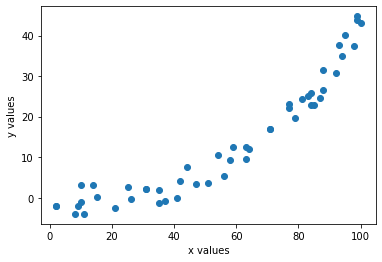

In [7]:
plt.scatter( curve.x, curve.y );
plt.xlabel("x values")
plt.ylabel("y values")

In [10]:
# Input
# degree - polynomial terms to be used in the model
def fit_poly( degree ):
    # calling numpy method polyfit
    p = np.polyfit( curve.x, curve.y, deg = degree )
    curve['fit'] = np.polyval( p, curve.x )
    # draw the regression line after fitting the model
    sn.regplot( curve.x, curve.y, fit_reg = False )
    # Plot the actual x and y values
    return plt.plot( curve.x, curve.fit, label='fit' )

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


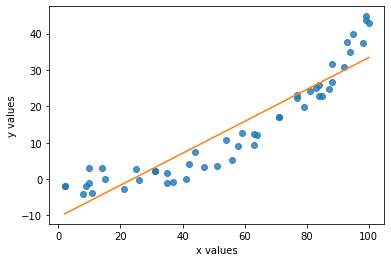

In [13]:
fit_poly( 1 );
## Plotting the model form and the data
plt.xlabel("x values")
plt.ylabel("y values");

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


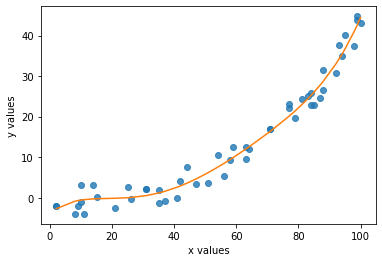

In [27]:
fit_poly(5);
plt.xlabel("x values")
plt.ylabel("y values");

1. To explore various polynomial forms, polyfit() from numpy library can be used. polyfit() takes X and Y values, and the degree of x features to be used to fit a model. 

2. Degree 1 means only value of x is used to predict y, whereas degree 2 means x and x2 are used to predict y. The following commands can be used for implementing a generic method fit_poly(), which takes degree as a parameter and builds a model with all required polynomial terms.

In [23]:
# Split the dataset into 60:40 split into training and test set

train_X, test_X, train_y, test_y = train_test_split( curve.x,
curve.y,
test_size = 0.40,
random_state = 100 )
# Define the dataframe store degree and rmse for training and test set
rmse_df = pd.DataFrame( columns = ["degree", "rmse_train", "rmse_test"] )
# Define a method to return the rmse given actual and predicted values.
def get_rmse( y, y_fit ):
    return np.sqrt( metrics.mean_squared_error( y, y_fit ) )
# Iterate from degree 1 to 15
for i in range( 1, 15 ):
    # fitting model
    p = np.polyfit( train_X, train_y, deg = i )
    # storing model degree and rmse on train and test set
    rmse_df.loc[i-1] = [ i,
        get_rmse( train_y, np.polyval( p, train_X ) ),
        get_rmse( test_y, np.polyval( p, test_X ) ) ]

In [24]:
rmse_df

,degree,rmse_train,rmse_test
0,1.0,5.226638,5.779652
1,2.0,2.394509,2.755286
2,3.0,2.233547,2.560184
3,4.0,2.231998,2.549205
4,5.0,2.197528,2.428728
5,6.0,2.062201,2.703880
6,7.0,2.039408,2.909237
7,8.0,1.995852,3.270892
8,9.0,1.979322,3.120420
9,10.0,1.976326,3.115875


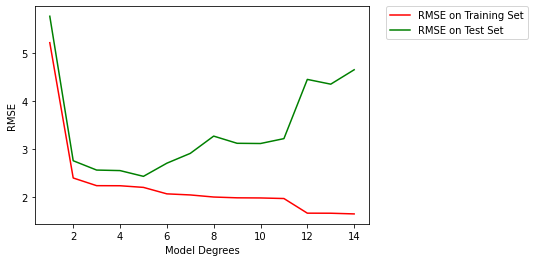

In [26]:
# plotting the rmse for training set in red color
plt.plot( rmse_df.degree, rmse_df.rmse_train, label='RMSE on Training Set', color = 'r' )
# plotting the rmse for test set in green color
plt.plot( rmse_df.degree, rmse_df.rmse_test, label='RMSE on Test Set', color = 'g' )
# Mention the legend
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.);
plt.xlabel("Model Degrees")
plt.ylabel("RMSE");